In [1]:
import json
import gzip

import tqdm

import numpy as np

from astropy.time import Time
from astropy import units as u

%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
# this file comes from running the get_travis_builds_info.py script
with gzip.open('travis_build_info.json.gz', 'rt') as f:
    build_info = json.load(f)

In [3]:
all_commit_times = []
commit_times = []
start_times = []
update_times = []

all_skipped = []
skipped = []
for i, b in enumerate(build_info):
        all_commit_times.append(b['commit']['committed_at'])
        commit_times.append(all_commit_times[-1])
        start_times.append(b['started_at'])
        update_times.append(b['updated_at'])
        
        if all_commit_times[-1] is None:
            del all_commit_times[-1]
            all_skipped.append(i)
        
        if commit_times[-1] is None or start_times[-1] is None or update_times[-1] is None:
            del commit_times[-1]
            del start_times[-1]
            del update_times[-1]
            skipped.append(i)
            
all_commit_times = Time(all_commit_times)
commit_times = Time(commit_times)
start_times = Time(start_times)
update_times = Time(update_times)
            
len(skipped), len(all_skipped), len(commit_times)

(878, 25, 17312)

In [4]:
freeze_times = {}
freeze_times['2.0'] = Time('2017-6-18')
freeze_times['1.3'] = Time('2016-12-7')
freeze_times['1.2'] = Time('2016-5-13')
freeze_times['1.1'] = Time('2015-10-15')
freeze_times['1.0'] = Time('2014-12-19')

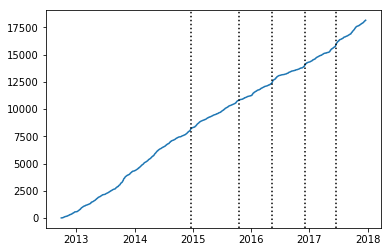

In [5]:
plt.plot_date(np.sort(all_commit_times.plot_date), np.arange(len(all_commit_times)), '-')

for t in freeze_times.values():
    plt.axvline(t.plot_date, c='k', ls=':')

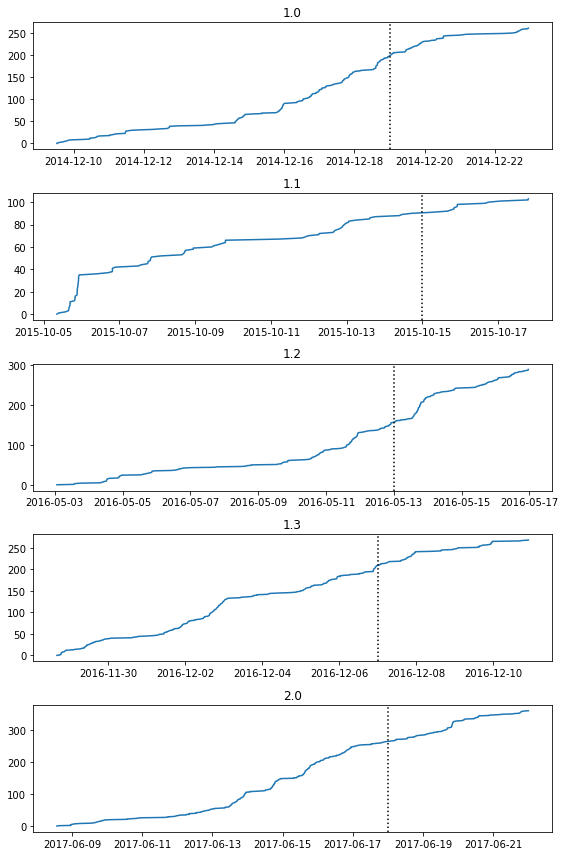

In [6]:
fig, axs = plt.subplots(len(freeze_times), 1, figsize=(8, 12))

for vers, ax in zip(sorted(freeze_times), axs):
    t = freeze_times[vers]
    lower = t - 10*u.day
    upper = t + 4*u.day
    inwindow = all_commit_times[(lower<all_commit_times) & (all_commit_times<upper)]
    
    ax.plot_date(np.sort(inwindow.plot_date), np.arange(len(inwindow)), '-')
    ax.axvline(t.plot_date, c='k', ls=':')
    ax.set_title(vers)
fig.tight_layout()